In [2]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
file = open('./Tilt_tolerance_higher_precision.csv','r')
rdr = csv.reader(file)
prompt = float(0)
var = [0,-0.004,-0.002,0.002,0.004] #Put the proper set value in front. This may be Rrod, Hrod, Tilt angle etc. Write all the cases.
dt = np.zeros((len(var),9), dtype=object) # Angle / Freq / C / Gtot / Grod
data = dict(zip(var,dt))

for line in rdr:
   for v in var:
      if(float(line[1]) == float(v) and float(line[4])>0.05): 
         #print(float(line[0]))
         data[v][0] = np.append(data[v][0],float(line[0]))
         data[v][1] = np.append(data[v][1],float(line[2]))
         data[v][2] = np.append(data[v][2],float(line[4]))
         data[v][3] = np.append(data[v][3],float(line[-2]))
         data[v][4] = np.append(data[v][4],float(line[-1]))
for v in var:
    for i in range (5):
      data[v][i] = data[v][i][1:]
print(data[0])

[array([100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.])
 array([1.7506, 1.7534, 1.7562, 1.759 , 1.7617, 1.7645, 1.767 , 1.7697,
        1.7722, 1.7748, 1.7773])
 array([0.73281, 0.73245, 0.73214, 0.73197, 0.73146, 0.73103, 0.73036,
        0.73018, 0.7298 , 0.72938, 0.7289 ])
 array([1617000.   , 1617266.667, 1613600.   , 1610266.667, 1610600.   ,
        1606333.333, 1610800.   , 1610933.333, 1612600.   , 1610466.667,
        1611133.333])
 array([13523333.33, 13497333.33, 13512666.67, 13521333.33, 13491333.33,
        13504000.  , 13434666.67, 13510000.  , 13488000.  , 13462000.  ,
        13440666.67])                                                    0
 0 0 0]


In [3]:
def cube(x,a,b,c,d):
   return a*np.power(x,3)+b*np.power(x,2)+c*np.power(x,1)+d
def quad(x,a,b,c):
   return a*np.power(x,2)+b*np.power(x,1)+c

if (type(data[v][-2])==int):
   for v in var:
      x = data[v][1] #frequency
      y1 = data[v][2] #C
      y2 = data[v][3] #Qtot
      y3 = data[v][4] #Qrod
      popt_C, pcov_C = curve_fit(cube,x,y1)
      popt_Qtot, pcov_Qtot = curve_fit(quad,x,y2)
      popt_Qrod, pcov_Qrod = curve_fit(quad,x,y3)
      data[v][-3] = np.append(data[v][-3],popt_C)
      data[v][-3] = data[v][-3][1:]
      data[v][-2] = np.append(data[v][-2],popt_Qtot)
      data[v][-2] = data[v][-2][1:]
      data[v][-1] = np.append(data[v][-1],popt_Qrod)
      data[v][-1] = data[v][-1][1:]
#print(data[0])

Text(0.5, 1.0, 'Rod Angle v. Frequency')

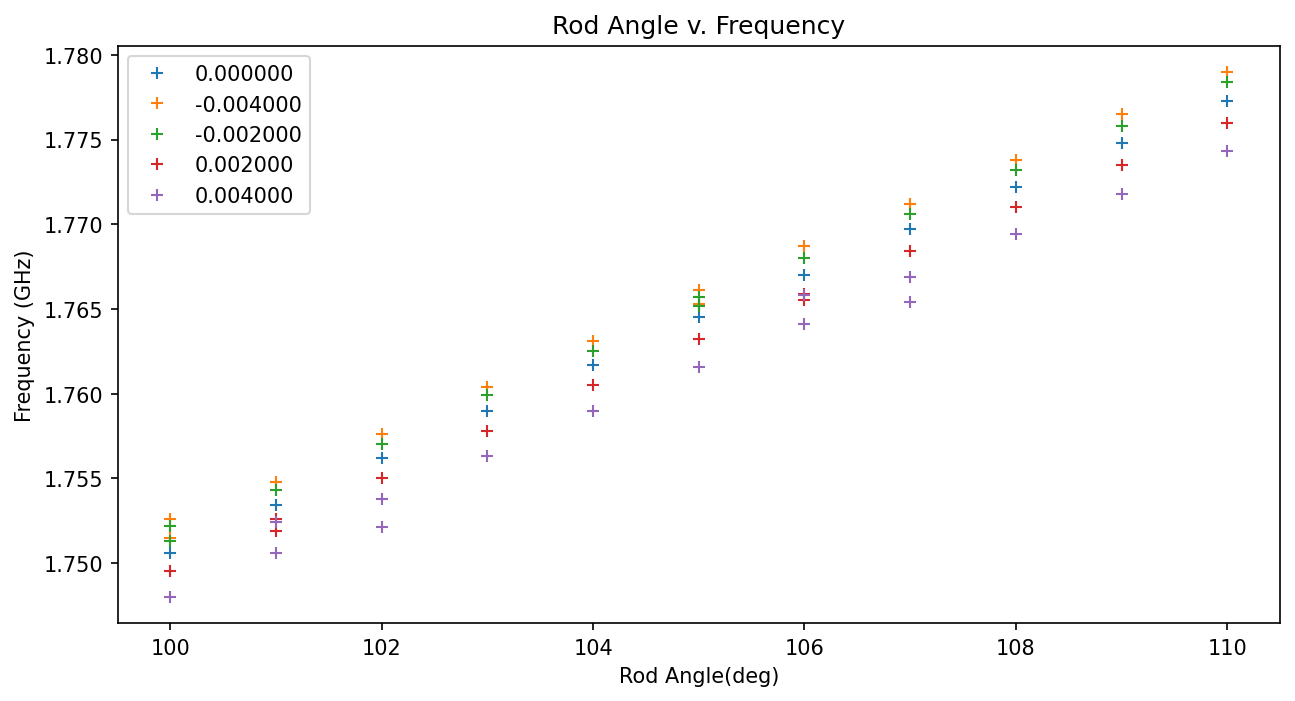

In [10]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
for v in var:
   angle = data[v][0]
   freq = data[v][1]
   label = '%f' %v
   axs.plot(angle,freq,marker='+',linestyle='None',label=label)
axs.legend()
axs.set_xlabel("Rod Angle(deg)")
axs.set_ylabel("Frequency (GHz)")
axs.set_title("Rod Angle v. Frequency")

Text(0.5, 1.0, 'C v. Frequency (Radial Tilt in mm)')

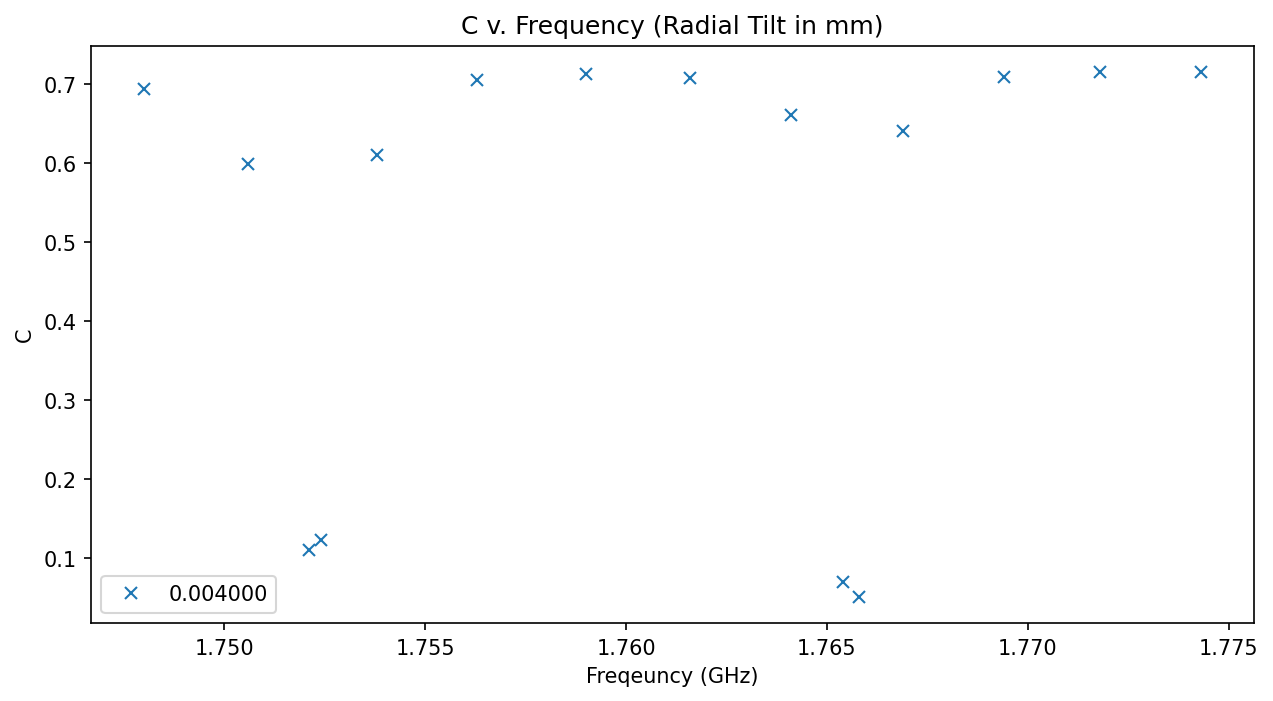

In [12]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   if (1):
      freq = data[v][1] # freq of prompt
      pmt = data[v][2] # C of prompt
      label = '%f' % v
      if v == 0.004:
         axs.plot(freq,pmt,marker='x',linestyle='', label=label)
axs.legend()
axs.set_ylabel('C')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('C v. Frequency (Radial Tilt in mm)')

Text(0.5, 1.0, 'G_tot v. Frequency (Radial Tilt in mm)')

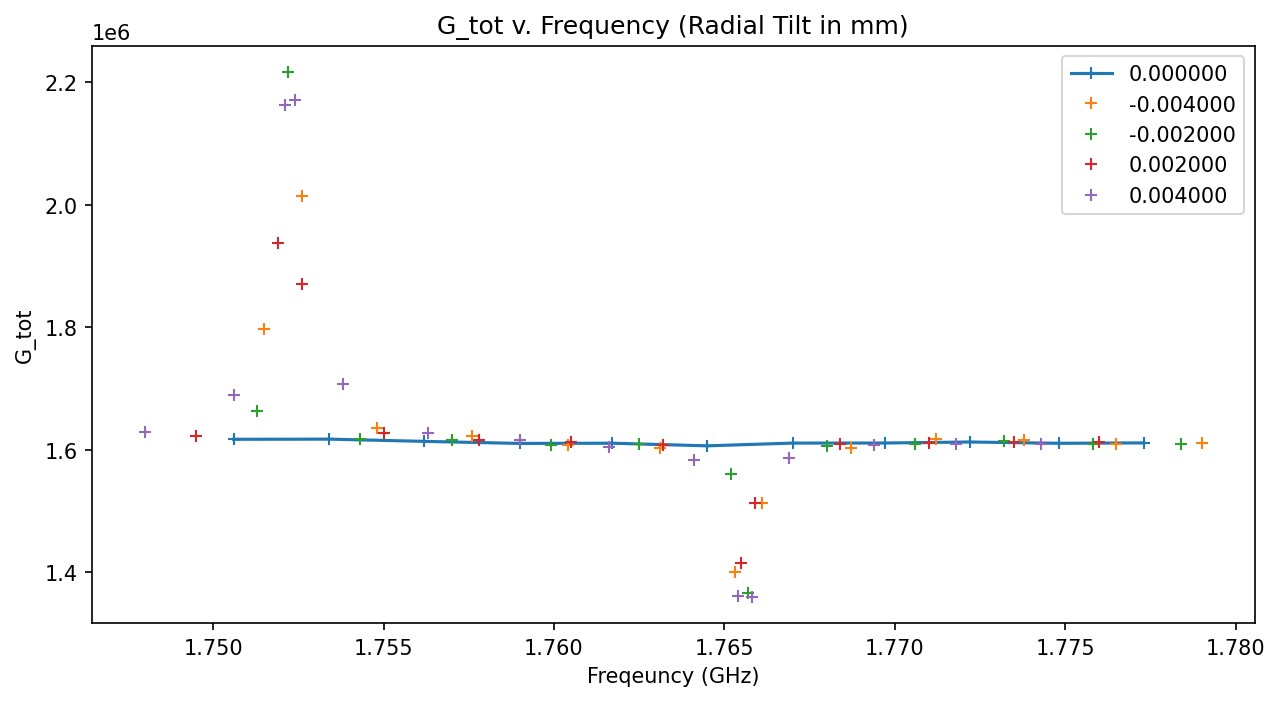

In [15]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   if (1):
      freq = data[v][1] # freq of prompt
      pmt = data[v][3] # Qtot of prompt
      label = '%f' % v
      if v == 0:
         axs.plot(freq,pmt,marker='+',linestyle='-', label=label)
      else:
         axs.plot(freq,pmt,marker='+',linestyle='', label=label)
axs.legend()
axs.set_ylabel('G_tot')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('G_tot v. Frequency (Radial Tilt in mm)')

Text(0.5, 1.0, 'G_rod v. Frequency (Radial Tilt in mm)')

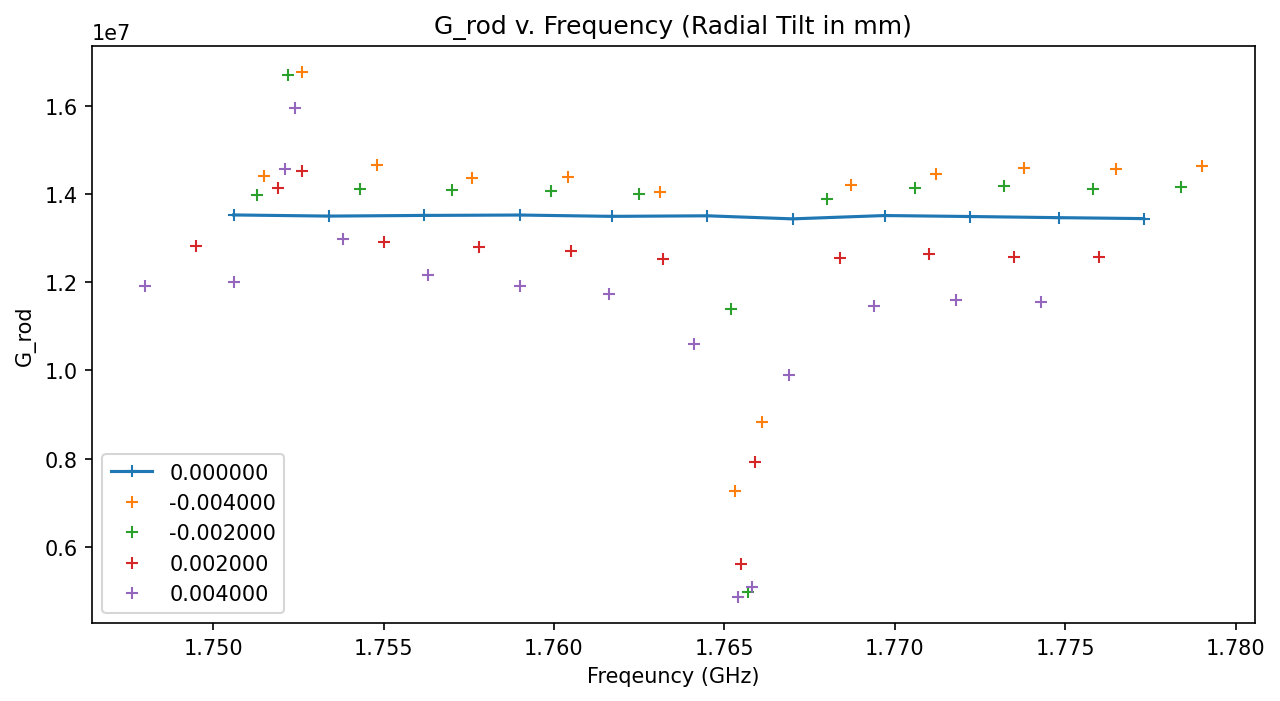

In [14]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   if (1):
      freq = data[v][1] # freq of prompt
      pmt = data[v][4] # Qtot of prompt
      label = '%f' % v
      if v == 0:
         axs.plot(freq,pmt,marker='+',linestyle='-', label=label)
      else:
         axs.plot(freq,pmt,marker='+',linestyle='', label=label)
axs.legend()
axs.legend()
axs.set_ylabel('G_rod')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('G_rod v. Frequency (Radial Tilt in mm)')